#Data

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False) # fetch MNIST

X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

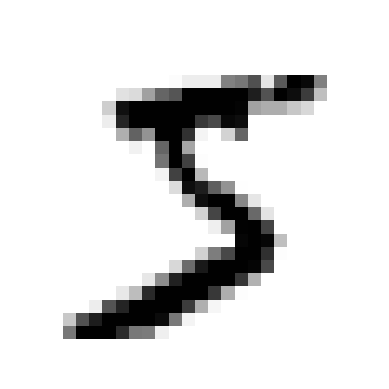

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show() #plot an image

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

In [ ]:
import numpy as np
unique_values, counts = np.unique(y, return_counts=True)
print(unique_values)
print(counts)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


In [ ]:
y[0]

'5'

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #train test split

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5') #Create target vector

In [ ]:
print(y_train_5)

[ True False False ...  True False False]


#Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
predictions = sgd_clf.predict(X_train)
predictions

array([ True, False, False, ...,  True, False, False])

In [ ]:
predictions.shape

(60000,)

In [ ]:
unique_values, counts = np.unique(predictions, return_counts=True)
print(unique_values)
print(counts)

[False  True]
[52917  7083]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train_5, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9522666666666667


In [ ]:
matches = np.sum( predictions == y_train_5)
print(matches/len(y_train_5))

0.9522666666666667


#Dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
dummy_false = np.full_like(y_train_5, False)
print(dummy_false)

[False False False ... False False False]


In [ ]:
unique_values, counts = np.unique(dummy_clf.predict(X_train), return_counts=True)
print(unique_values)
print(counts)

[False]
[60000]


In [ ]:
matches = np.sum( dummy_clf.predict(X_train) == y_train_5)
print(matches/len(y_train_5))

0.90965
